In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df (2).csv


In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Read data
df = pd.read_csv("df.csv")

df

,index,A,B,C,D,E,F,G,H,I,type
0,0,1.67,16.10,4.42,2.32,101.77,0.88,13.31,0.00,0.00,2
1,1,1.67,16.27,4.64,2.79,101.43,0.96,12.74,0.00,0.00,1
2,2,1.67,17.72,4.88,0.55,100.83,0.04,14.40,0.00,0.00,0
3,3,1.68,15.97,4.65,1.56,100.79,0.18,16.27,0.00,0.05,0
4,4,1.67,15.28,2.41,3.53,101.77,0.90,16.14,0.00,0.00,3
...,...,...,...,...,...,...,...,...,...,...,...
209,209,1.67,17.83,2.86,3.91,98.36,1.14,15.62,0.00,0.00,5
210,210,1.68,13.22,0.00,1.42,102.31,0.00,23.94,0.00,0.00,1
211,211,1.67,16.64,0.00,4.83,102.52,0.21,15.06,1.38,0.02,5
212,212,1.67,16.06,0.00,2.66,101.15,0.50,20.00,0.00,0.00,3


In [ ]:
# Number of rows
n_rows = df.shape[0]
n_rows

214

In [ ]:
# Column names
column_names = df.columns.tolist()
column_names

['index', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'type']

In [ ]:
# Dimensions
# Get dimensions of the DataFrame

dimensions = df.shape
dimensions

(214, 11)

In [ ]:
# Describle your datas
described_df = df.describe()
print(described_df)

            index           A           B           C           D           E  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   106.500000    1.670467   16.089626    3.489813    2.745140  101.711215   
std     61.920648    0.003324    0.979979    1.875170    0.948929    1.084305   
min      0.000000    1.660000   12.880000    0.000000    0.550000   97.730000   
25%     53.250000    1.670000   15.490000    2.752500    2.260000  101.190000   
50%    106.500000    1.670000   15.960000    4.520000    2.580000  101.910000   
75%    159.750000    1.670000   16.592500    4.680000    3.100000  102.325000   
max    213.000000    1.690000   20.860000    5.840000    6.650000  105.570000   

                F           G           H           I        type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.745748   14.330888    0.297710    0.102757    1.542056  
std      0.978743    2.276731    0.845669    0.175548    1.707648 

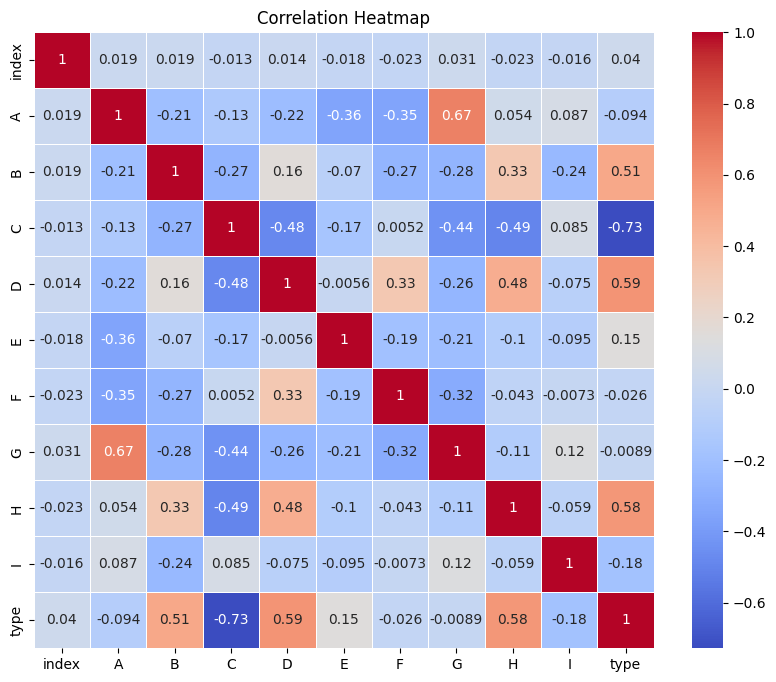

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set size of heatmap
plt.figure(figsize=(10,8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Drop the 'index' column
upd_df = df.drop(columns='index')
upd_df

,A,B,C,D,E,F,G,H,I,type
0,1.67,16.10,4.42,2.32,101.77,0.88,13.31,0.00,0.00,2
1,1.67,16.27,4.64,2.79,101.43,0.96,12.74,0.00,0.00,1
2,1.67,17.72,4.88,0.55,100.83,0.04,14.40,0.00,0.00,0
3,1.68,15.97,4.65,1.56,100.79,0.18,16.27,0.00,0.05,0
4,1.67,15.28,2.41,3.53,101.77,0.90,16.14,0.00,0.00,3
...,...,...,...,...,...,...,...,...,...,...
209,1.67,17.83,2.86,3.91,98.36,1.14,15.62,0.00,0.00,5
210,1.68,13.22,0.00,1.42,102.31,0.00,23.94,0.00,0.00,1
211,1.67,16.64,0.00,4.83,102.52,0.21,15.06,1.38,0.02,5
212,1.67,16.06,0.00,2.66,101.15,0.50,20.00,0.00,0.00,3


In [ ]:
# Training and test data split (70:30)

# Splitting axis in variables
X = df.drop(columns=['type'])
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [ ]:
training_value_counts = y_train.value_counts()

# Display class distribution in training and test data
print("Class distribution in training data:")
print(training_value_counts)

print("\nClass distribution in test data:")
print(y_test.value_counts())

Class distribution in training data:
type
1    59
0    45
5    18
2    12
3     9
4     6
Name: count, dtype: int64

Class distribution in test data:
type
0    25
1    17
5    11
2     5
3     4
4     3
Name: count, dtype: int64


Now it's my turn to create a pie chart with my class distribution data.



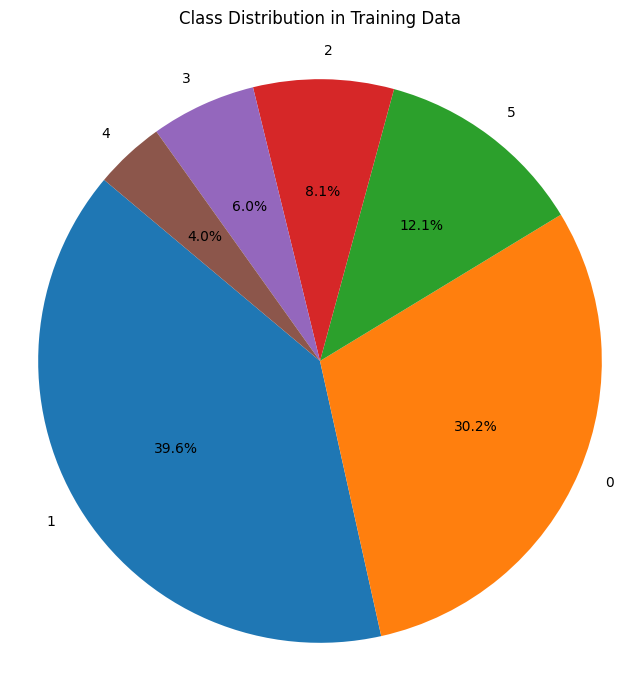

In [ ]:
# Creating pie chart
plt.figure(figsize=(8, 8))
plt.pie(training_value_counts, labels=training_value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution in Training Data\n')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

print("Now it's my turn to create a pie chart with my class distribution data.\n")
plt.show()

Now it's my turn to create a pie chart with my class distribution data.

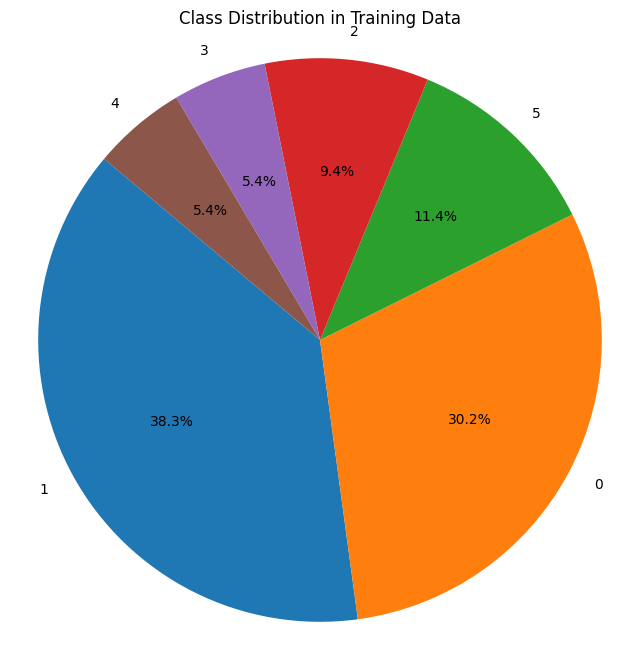

In [ ]:
# Multinomial logistic regression model
# Training the model
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Prediction on the training data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, predictions)
print("Accuracy:", accuracy)
print("Confusion matrix on training data:")
# Calculate the confusion matrix
cm_training = confusion_matrix(y_train, predictions)
print(cm_training)


Accuracy: 0.6711409395973155
Confusion matrix on training data:
[[26 19  0  0  0  0]
 [12 46  0  0  1  0]
 [ 9  3  0  0  0  0]
 [ 0  2  0  7  0  0]
 [ 0  2  0  0  4  0]
 [ 0  1  0  0  0 17]]


In [ ]:
# Prediction on the test data
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Confusion matrix on test data:")
# Calculate the confusion matrix
cm_test = confusion_matrix(y_test, predictions)
print(cm_test)

Accuracy: 0.6923076923076923
Confusion matrix on test data:
[[17  8  0  0  0  0]
 [ 3 12  0  2  0  0]
 [ 3  2  0  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  0 10]]


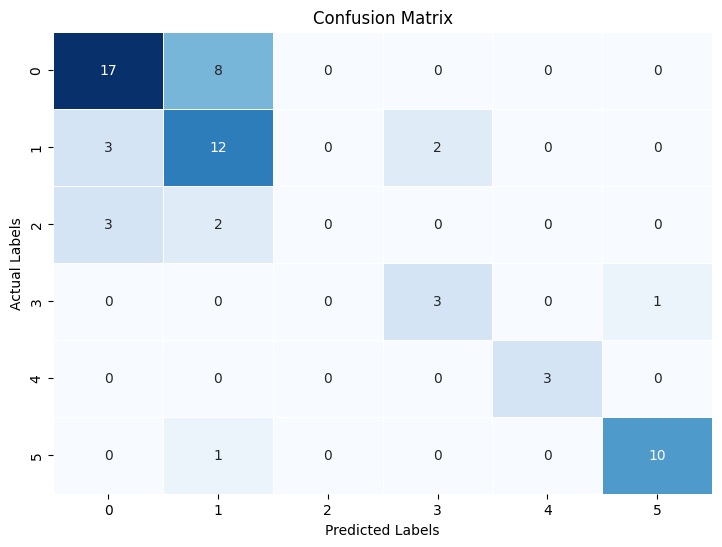

Confusion Matrix:
[[17  8  0  0  0  0]
 [ 3 12  0  2  0  0]
 [ 3  2  0  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  0 10]]


In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Set up the matplotlib figure
plt.figure(figsize=(8.5, 6))

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, linewidths=0.5, cmap="Blues", cbar=False)

plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.title("Confusion Matrix")

# Show plot
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

It's my turn to create my confusion matrix.

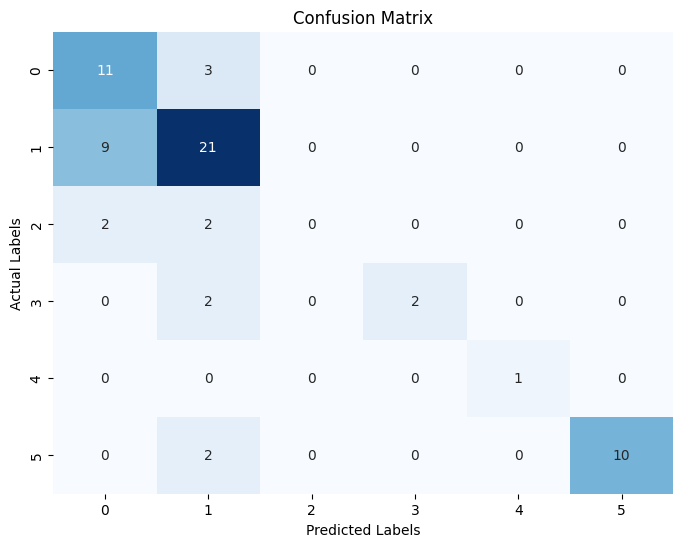